In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [68]:
dataset = pd.read_csv('KMeansData.csv')
dataset

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79
...,...,...
95,6.21,56
96,7.76,84
97,5.22,87
98,6.65,13


In [55]:
X = dataset.iloc[:,:].values
# X = dataset.values
# X = dataset.to_nunmpy()
X[:5]
X

array([[  7.33,  73.  ],
       [  3.71,  55.  ],
       [  3.43,  55.  ],
       [  3.06,  89.  ],
       [  3.33,  79.  ],
       [  7.22,  26.  ],
       [  8.12,  15.  ],
       [  5.74,  62.  ],
       [  8.73,  59.  ],
       [  4.73,  74.  ],
       [  5.  ,  78.  ],
       [  2.63,  46.  ],
       [  7.02,   5.  ],
       [  3.45,  38.  ],
       [  3.06,  49.  ],
       [  4.13,  66.  ],
       [  9.17,  29.  ],
       [  7.61,  74.  ],
       [  0.94,  34.  ],
       [  3.67,  71.  ],
       [  8.47,   9.  ],
       [  2.86,  67.  ],
       [  1.9 ,  43.  ],
       [  6.08,   0.  ],
       [  8.42,  90.  ],
       [  6.12,  77.  ],
       [  0.  ,  47.  ],
       [  2.16,  50.  ],
       [  2.24,  38.  ],
       [  2.31,  23.  ],
       [  8.03,  31.  ],
       [  9.02,   2.  ],
       [  2.43,  20.  ],
       [  4.5 ,  80.  ],
       [  8.66,  70.  ],
       [  7.95,  75.  ],
       [  2.03,  26.  ],
       [  5.43,  74.  ],
       [  4.44,  78.  ],
       [  3.17,  76.  ],


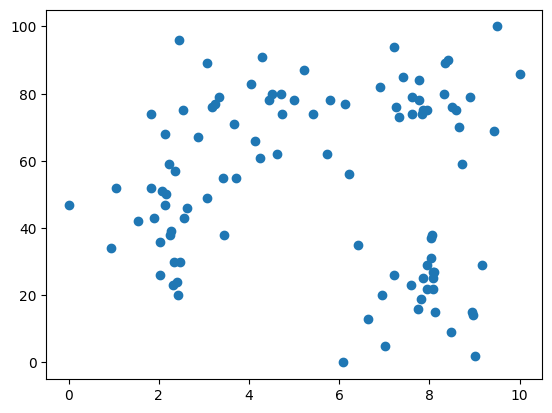

In [56]:
plt.scatter(X[:,0],X[:,1])


(0.0, 100.0)

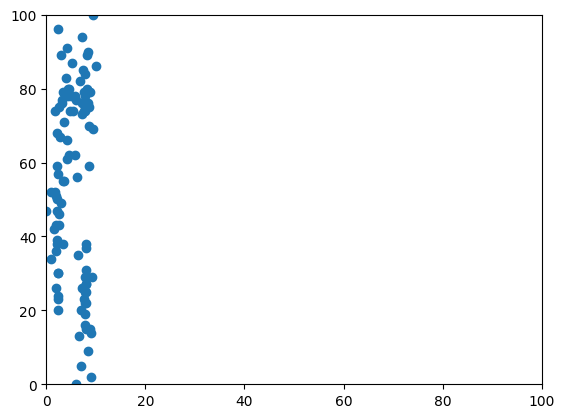

In [57]:
plt.scatter(X[:,0],X[:,1])
plt.xlim(0,100)
plt.ylim(0,100)

피처 스케일링 (Feature Scaling)


In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

: 

Text(0, 0.5, 'score')

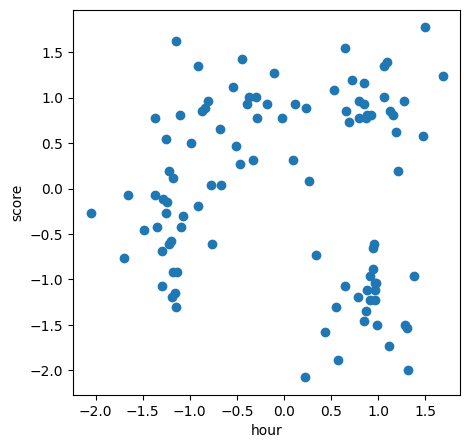

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('hour')
plt.ylabel('score')

최적의 K 값 찾기 (Elbow Method)

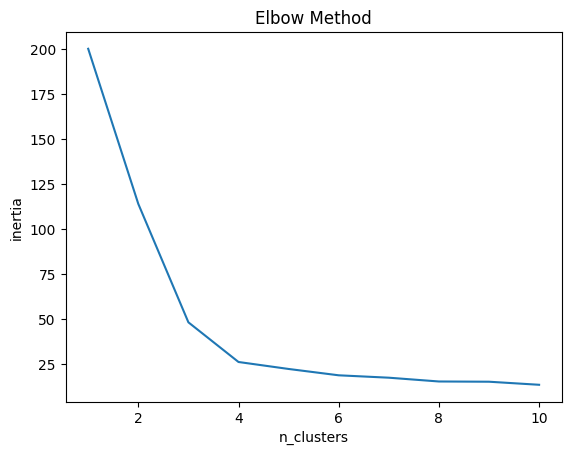

In [60]:
from sklearn.cluster import KMeans
inertia_list  = []
for i in range(1,11) :
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합

plt.plot(range(1,11),inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

최적의 k (4) 값으로 KMeans 학습

In [61]:
OptimalK  = 4 # optimal K 의 값


In [65]:
centers = kmeans.cluster_centers_
centers

array([[-0.54299598,  0.79316666],
       [ 0.96910697,  0.97133061],
       [ 0.8837666 , -1.26929779],
       [-1.24939347, -0.48807293]])

In [63]:
kmeans =KMeans(n_clusters=OptimalK , random_state=0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans


array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
       3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


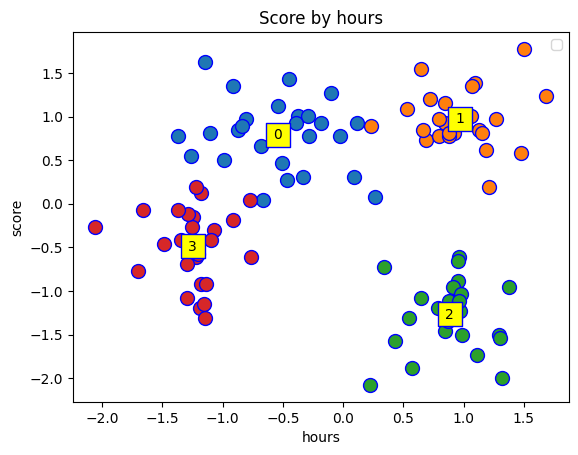

In [67]:
for cluster in range(OptimalK) :
    plt.scatter(X[y_kmeans==cluster,0],X[y_kmeans==cluster,1],s=100,edgecolors='b')
    plt.scatter(centers[cluster,0],centers[cluster,1],s = 300,edgecolors='b',color ='yellow',marker='s')
    plt.text(centers[cluster,0],centers[cluster,1],cluster,va='center',ha='center')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')

스케일링 원복

In [70]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [71]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

Text(0, 0.5, 'score')

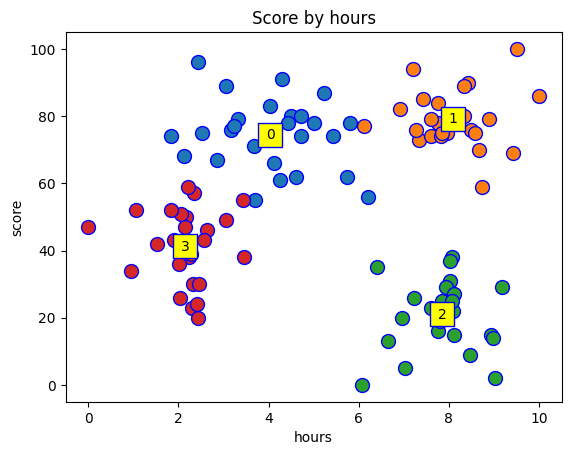

In [72]:
for cluster in range(OptimalK) :
    plt.scatter(X_org[y_kmeans==cluster,0],X_org[y_kmeans==cluster,1],s=100,edgecolors='b')
    plt.scatter(centers_org[cluster,0],centers_org[cluster,1],s = 300,edgecolors='b',color ='yellow',marker='s')
    plt.text(centers_org[cluster,0],centers_org[cluster,1],cluster,va='center',ha='center')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')

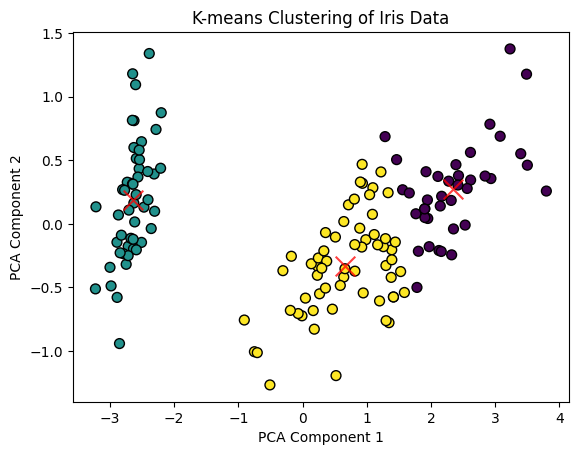

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# PCA를 이용한 2D 변환 (시각화를 위해)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 클러스터 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Iris Data')
plt.show()
